# **Youtube Comments Sentiment Analysis**

Get YouTube Comments — Given a YouTube video you need to fetch the comments on that video. This can be accomplished by using the APIs from YouTube.

# **1. Data selection**
*  I created my own dataset using the Google Youtube Data API version 3.0. The exact steps of data creation is presented in section.

*  The dataset used in this research is a real-world dataset, making it well-suited for our study. However, it's important to note that the selection of YouTube channels included in this research is based solely on my familiarity with channels in the field of data science. This selection may not be entirely comprehensive or universally representative. For the purposes of this sentiment analysis, we focus on the "First 10 Comments" from each video within these channels, along with the video titles.

# **2. Aims and objectives**

> **Within this project, I would like to explore the following:**

* Explore the trending topics using Sentiment Analysis techniques

    * Which questions are being asked in the comment sections in the videos 

# **3. Steps of the project**
1.   Obtain video meta data via the Youtube API for the first 10 comments on each video on the Youtube channel in the data science niche. (this includes several small steps: create a developer key, request data, and transform the responses into a usable data format.)
2.   Prepocess data and engineer additional features for analysis
3.   Exploratory data analysis
4.   Conclusions


# Importing Libraries

*  Run the following commands to prepare a virtual environment and install the required packages.

In [70]:
#Libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

# The ast module in Python stands for "Abstract Syntax Tree"
import ast
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Khunkan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Khunkan\AppData\Roaming\nltk_data...


True

# Read data from "Exploratory Data Analysing Using Youtube" Project

In [2]:
video_df = pd.read_csv('./data/video_df.csv')
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,pT3kE5hExGc,Data Professor,Streamlit LLM Hackathon,If large language models and generative AI sou...,NaN,2023-09-08T09:10:04Z,4243,93,0,12,PT3M27S,hd,False
1,T_iE6TT7pS8,Data Professor,How to Use the Open-Source Hugging Chat API in...,"In this video, you'll learn how to use the uno...","['huggingchat', 'hugging chat', 'hugging chat ...",2023-08-28T05:05:38Z,2188,77,0,16,PT7M38S,hd,False
2,kvJf8s18Vr4,Data Professor,How to use GitHub Codespaces for Coding and Da...,"In this video, you'll learn how to use GitHub ...","['GitHub', 'GitHub Codespaces', 'GitHub tutori...",2023-08-21T01:00:30Z,3282,149,0,8,PT11M53S,hd,False
3,Lxj4GfJCvxA,Data Professor,Introducing the Mito Streamlit component,"In this video, Jake (co-founder of Mito, a Y C...","['mito', 'streamlit component', 'mito streamli...",2023-08-14T07:29:14Z,1137,37,0,4,PT4M32S,hd,False
4,dBoQLktIkOo,Data Professor,How to use the Llama 2 LLM in Python,"In this video, you'll learn how to use the Lla...",NaN,2023-08-01T03:23:49Z,27247,376,0,24,PT4M51S,hd,False


In [3]:
comment_df = pd.read_csv('./data/comments_df.csv')
comment_df.head()

,video_id,comments
0,pT3kE5hExGc,"['Hi Professor, How are you. once you taught h..."
1,T_iE6TT7pS8,['Great idea for my next project. Thanks a lot...
2,kvJf8s18Vr4,['I have GitHub student dev pack should I use ...
3,Lxj4GfJCvxA,['There are many things for which I will like ...
4,dBoQLktIkOo,"['Where does we get ""llm model path"" which you..."


# Data pre-processing

## Exploratory data analysis
Exploratory Data Analysis is an audit process or explore the basics It is the necessary data analysis before using the data. Alternatively, it can be utilized for insight analysis. The advantages of EDA assist us in comprehending the fundamentals of that data set, as well as exploring the missing value and imperfection of the data set.

In [4]:
comment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  322 non-null    object
 1   comments  322 non-null    object
dtypes: object(2)
memory usage: 5.2+ KB


Explor missing value by dataset.isnull().sum() in dataset

In [5]:
comment_df.isnull().sum()

video_id    0
comments    0
dtype: int64

**Merge DataFrame with a database-style join.**

a named Series object is essentially treated as a DataFrame with a single named column. I want to perform a join operation based on the 'video_id' column. Specifically, I aim to take the 'title' column from the 'video_df' DataFrame and incorporate it into the 'comment_df' DataFrame."

In [6]:
comment_df = video_df.merge(comment_df, how = "inner",on = 'video_id')
comment_df = comment_df[['video_id','title','comments']]
comment_df

,video_id,title,comments
0,pT3kE5hExGc,Streamlit LLM Hackathon,"['Hi Professor, How are you. once you taught h..."
1,T_iE6TT7pS8,How to Use the Open-Source Hugging Chat API in...,['Great idea for my next project. Thanks a lot...
2,kvJf8s18Vr4,How to use GitHub Codespaces for Coding and Da...,['I have GitHub student dev pack should I use ...
3,Lxj4GfJCvxA,Introducing the Mito Streamlit component,['There are many things for which I will like ...
4,dBoQLktIkOo,How to use the Llama 2 LLM in Python,"['Where does we get ""llm model path"" which you..."
...,...,...,...
317,uoVAd_zd-90,Computational Drug Discovery: Machine Learning...,['Thank you Prof for sharing this video . I lo...
318,77ggqTODduQ,WEKA Tutorial #1.3 - How to Build a Data Minin...,"['Wonderful!', 'Build a classification model f..."
319,U_WEKreNuA4,WEKA Tutorial #1.2 - How to Build a Data Minin...,"['❤️🙏🏻❤️', 'Please explain no. of leaves and s..."
320,GzrmsiBsGVI,WEKA Tutorial #1.1 - How to Build a Data Minin...,['This was WAY too long. This could have effec...


**Formatting option**

Due to the structure of the comment data, where all 10 comments are stored in a single list and separated by commas within the same row, it becomes challenging to conduct Sentiment Analysis. Therefore, there is a need to reformat the data so that each comment occupies a single row in the 'comments' column.

This translation captures the challenges in analyzing the sentiment of comments when they are stored in a list within a single row, and it clarifies the need for reformatting the data.

In [7]:
# Create a new DataFrame to keep the result.
data = {'video_id': [], 'comments': []}

# loop through each row of an existing DataFrame
for index, row in comment_df.iterrows():
    input_str = row['comments']
    input_list = ast.literal_eval(input_str)
    
    for sentence in input_list:
        data['video_id'].append(row['video_id'])
        data['comments'].append(sentence)

# Change from dictionary to DataFrame
df = pd.DataFrame(data)

In [8]:
df

,video_id,comments
0,pT3kE5hExGc,"Hi Professor, How are you. once you taught how..."
1,pT3kE5hExGc,Could you please make video on protein mutatio...
2,pT3kE5hExGc,without using a paid open AI API key we can't ...
3,pT3kE5hExGc,Pretty sure I will not even have those socks b...
4,pT3kE5hExGc,This sounds great !
...,...,...
2841,IYHrZx0G12w,This is great info ♥ i recently got my grade i...
2842,IYHrZx0G12w,Inspired to code
2843,IYHrZx0G12w,Sir can I become data scientist coz i have PCB...
2844,IYHrZx0G12w,Thank you very much for sharing your experienc...


In [9]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["comments"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["comments"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["comments"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["comments"]]
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment

In [10]:
data=df.drop(['Positive','Negative','Neutral','Compound'],axis=1)
data.head()

,video_id,comments,Sentiment
0,pT3kE5hExGc,"Hi Professor, How are you. once you taught how...",Neutral
1,pT3kE5hExGc,Could you please make video on protein mutatio...,Positive
2,pT3kE5hExGc,without using a paid open AI API key we can't ...,Neutral
3,pT3kE5hExGc,Pretty sure I will not even have those socks b...,Positive
4,pT3kE5hExGc,This sounds great !,Positive


In [11]:
df_1 = video_df.merge(data, how = 'inner', on = 'video_id')
data = df_1[['video_id', 'title', 'comments', 'Sentiment']]
data

,video_id,title,comments,Sentiment
0,pT3kE5hExGc,Streamlit LLM Hackathon,"Hi Professor, How are you. once you taught how...",Neutral
1,pT3kE5hExGc,Streamlit LLM Hackathon,Could you please make video on protein mutatio...,Positive
2,pT3kE5hExGc,Streamlit LLM Hackathon,without using a paid open AI API key we can't ...,Neutral
3,pT3kE5hExGc,Streamlit LLM Hackathon,Pretty sure I will not even have those socks b...,Positive
4,pT3kE5hExGc,Streamlit LLM Hackathon,This sounds great !,Positive
...,...,...,...,...
2841,IYHrZx0G12w,How a Biologist became a Data Scientist,This is great info ♥ i recently got my grade i...,Positive
2842,IYHrZx0G12w,How a Biologist became a Data Scientist,Inspired to code,Positive
2843,IYHrZx0G12w,How a Biologist became a Data Scientist,Sir can I become data scientist coz i have PCB...,Neutral
2844,IYHrZx0G12w,How a Biologist became a Data Scientist,Thank you very much for sharing your experienc...,Positive


**Sentiment Analysis of Comments**


From the sentiment analysis of comments on the video, it was found that the majority of comments were positive, with 2048 (72%) comments in that category. There were 587 (21%) neutral comments and 211 (7%) negative comments.

Positive : 2048 (72.0%)
Neutral : 587 (21.0%)
Negative : 211 (7.0%)


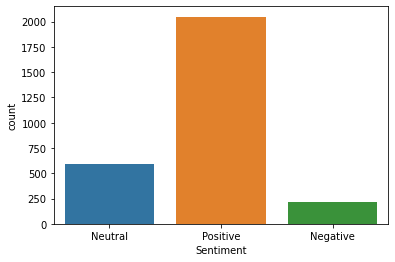

In [90]:
percent_sentiment = round(data.Sentiment.value_counts()/data.Sentiment.count() * 100,0)
counts = data['Sentiment'].value_counts()

for index in percent_sentiment.index:
    print(f"{index} : {counts[index]} ({percent_sentiment[index]}%)")

ax = sns.countplot(x = 'Sentiment', data = data)
plt.show()

In [61]:
labels = video_df.sort_values(by='viewCount', ascending=False).head(10)
labels = labels[['title']]
x = np.arange(len(labels))
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Data transformation**

In [12]:
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer() 
snowball_stemer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()

In [62]:
def text_processing(text):   
    # convert text into lowercase
    text = text.lower()

    # remove new line characters in text
    text = re.sub(r'\n',' ', text)
    
    # remove punctuations from text
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    
    # remove references and hashtags from text
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    
    # remove multiple spaces from text
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    # remove special characters from text
    text = re.sub(r'\W', ' ', text)

    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    
    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])
    
    # lemmatizer using WordNetLemmatizer from nltk package
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text

In [71]:
nltk.download('omw-1.4')
data_copy = data.copy()
data_copy.comments = data_copy.comments.apply(lambda text: text_processing(text))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Khunkan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


**Lable encoding**

In [72]:
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [74]:
processed_data = {
    'Sentence':data_copy.comments,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,Sentence,Sentiment
0,hi professor taught perform bioinformatics dis...,1
1,could please make video protein mutation predi...,2
2,without using paid open ai api key cant even p...,1
3,pretty sure even sock still awesome hahaha,2
4,sound great,2


# Imbalance data using SMOTE

Classification Algorithms: Classification get better results are obtained when the number of datasets for each group is equal. If the dataset is highly skewed, i.e. the number of individual datasets has a very different quantity, or it may be called imbalanced.

The challenge of working with **imbalanced datasets** is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

**Solution:** The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

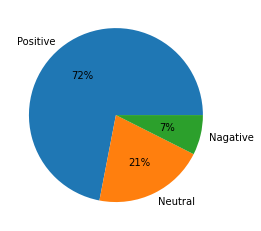

In [88]:
keys = ['Positive', 'Neutral', 'Nagative']
plt.pie(x = processed_data.Sentiment.value_counts(), data = processed_data , labels=keys , autopct='%.0f%%')
plt.show()


**Lmbalance type Over-sampling**

Randomly increase the number of minority data (Minor: 'Neutral', 'Nagative' ) up to the same as Major: 'Positive' class

In [93]:
df_neutral = processed_data[(processed_data['Sentiment']==1)] 
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 2048, 
                                 random_state=42)  

df_neutral_upsampled = resample(df_neutral, 
                                 replace=True,    
                                 n_samples= 2048, 
                                 random_state=42)  


# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])

In [94]:
final_data['Sentiment'].value_counts()

0    2048
1    2048
2    2048
Name: Sentiment, dtype: int64

In [97]:
corpus = []
for sentence in final_data['Sentence']:
    corpus.append(sentence)
corpus[0:5]

['nice video unfortunately get error timecharmap codec cant decode byte 0x9d position 1207412 character map undefined',
 'lost shannon nontut cinemad',
 'thanks explanation definition component see slight delay displaying page cause anxiety technology',
 'hello sir question able similar task adding r subprocess streamlit app tried deploying app show filenotfounderror errno 2 file directory rscript meaning dont r environment streamlit cloud think fix',
 'click start get error create log file resolve']

# Model training and evaluation

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

## Model training and evaluation: Gaussian Naïve Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

GaussianNB()

**Evaluation**

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[474,  19, 126],
       [  0, 596,  15],
       [ 13, 103, 498]], dtype=int64)

In [103]:
nb_score = accuracy_score(y_test, y_pred)
print('accuracy',nb_score)

accuracy 0.8503253796095445
